In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import diptest

# Clustering methods
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

# Indices
from sklearn.metrics import silhouette_score, davies_bouldin_score
# for k means use .inertia
# for GMM use .bic(X) and aic.(X)

# External indices
from sklearn.metrics import rand_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score

# Question 1

## Task 1

In [2]:
df = pd.read_csv("data.csv",index_col=0)

In [3]:
c_labels = pd.read_csv("labels.csv",index_col=0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 801 entries, sample_0 to sample_800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5+ MB


In [5]:
des = df.describe()

In [6]:
des

gene_0      gene_1      gene_2      gene_3      gene_4  gene_5  \
count  801.000000  801.000000  801.000000  801.000000  801.000000   801.0   
mean     0.026642    3.010909    3.095350    6.722305    9.813612     0.0   
std      0.136850    1.200828    1.065601    0.638819    0.506537     0.0   
min      0.000000    0.000000    0.000000    5.009284    8.435999     0.0   
25%      0.000000    2.299039    2.390365    6.303346    9.464466     0.0   
50%      0.000000    3.143687    3.127006    6.655893    9.791599     0.0   
75%      0.000000    3.883484    3.802534    7.038447   10.142324     0.0   
max      1.482332    6.237034    6.063484   10.129528   11.355621     0.0   

           gene_6      gene_7      gene_8      gene_9  ...  gene_20521  \
count  801.000000  801.000000  801.000000  801.000000  ...  801.000000   
mean     7.405509    0.499882    0.016744    0.013428  ...    5.896573   
std      1.108237    0.508799    0.133635    0.204722  ...    0.746399   
min      3.930747    0.000000    0.000000    0.000000  ...    2.853517   
25%      6.676042    0.000000    0.000000    0.000000  ...    5.454926   
50%      7.450114    0.443076    0.000000    0.000000  ...    5.972582   
75%      8.121984    0.789354    0.000000    0.000000  ...    6.411292   
max     10.718190    2.779008    1.785592    4.067604  ...    7.771054   

       gene_20522  gene_20523  gene_20524  gene_20525  gene_20526  gene_20527  \
count  801.000000  801.000000  801.000000  801.000000  801.000000  801.000000   
mean     8.765891   10.056252    4.847727    9.741987   11.742228   10.155271   
std      0.603176    0.379278    2.382728    0.533898    0.670371    0.580569   
min      6.678368    8.669456    0.000000    7.974942    9.045255    7.530141   
25%      8.383834    9.826027    3.130750    9.400747   11.315857    9.836525   
50%      8.784144   10.066385    5.444935    9.784524   11.749802   10.191207   
75%      9.147136   10.299025    6.637412   10.082269   12.177852   10.578561   
max     11.105431   11.318243    9.207495   11.811632   13.715361   11.675653   

       gene_20528  gene_20529  gene_20530  
count  801.000000  801.000000  801.000000  
mean     9.590726    5.528177    0.095411  
std      0.563849    2.073859    0.364529  
min      7.864533    0.593975    0.000000  
25%      9.244219    4.092385    0.000000  
50%      9.566511    5.218618    0.000000  
75%      9.917888    6.876382    0.000000  
max     12.813320   11.205836    5.254133  

[8 rows x 20531 columns]

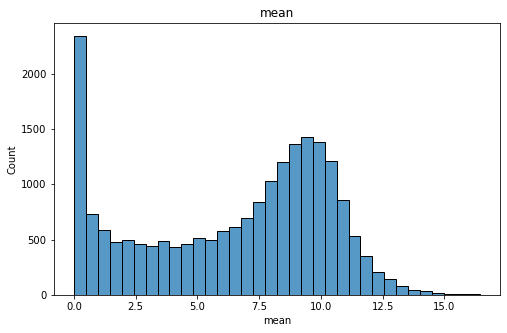

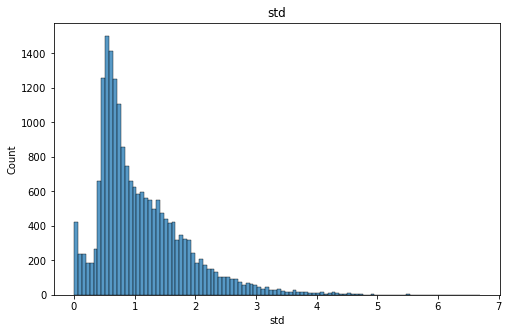

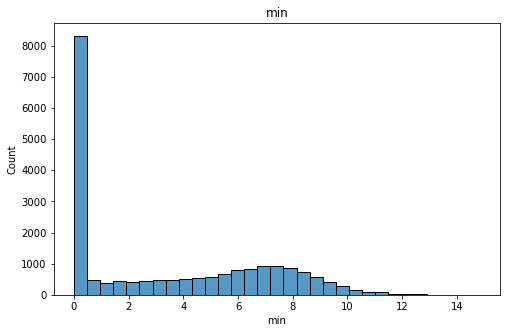

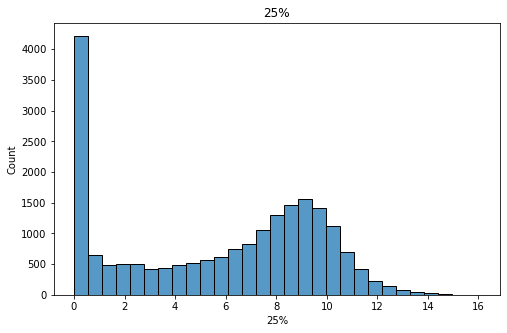

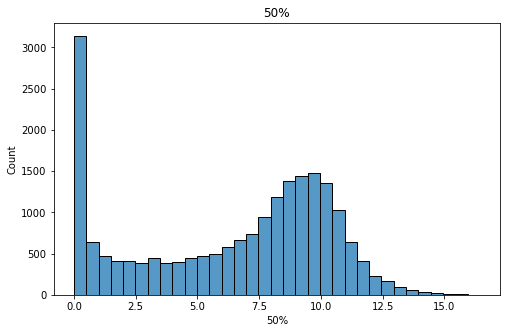

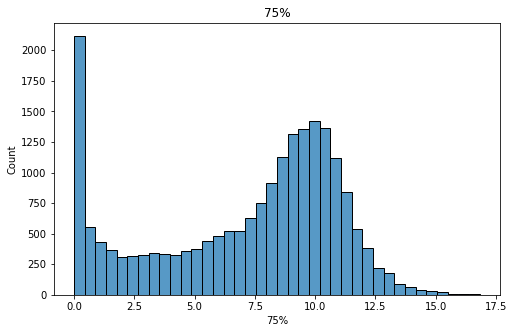

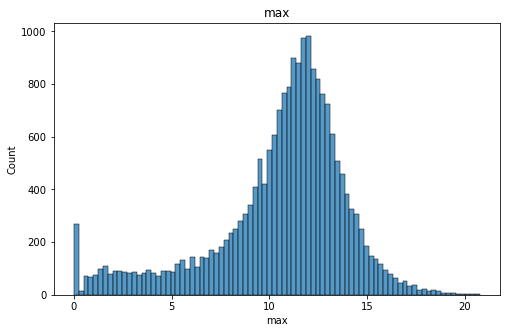

In [7]:
# stats
i = 1
for stat in des.index[1:]:
    plt.figure(figsize=(8,5))
    plt.title(stat)
    sns.histplot(x=des.iloc[i])
    plt.show()
    plt.close()
    i+=1

## Task 2

In [8]:
des_2 = des.T
des_2[des_2["std"]==0]

count  mean  std  min  25%  50%  75%  max
gene_5      801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
gene_23     801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
gene_4370   801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
gene_4808   801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
gene_4809   801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
...           ...   ...  ...  ...  ...  ...  ...  ...
gene_18915  801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
gene_19450  801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
gene_19451  801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
gene_19452  801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0
gene_19671  801.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0

[267 rows x 8 columns]

267 rows with variance 0, they have no information at all

In [9]:
# variance filtering
des_3 = des_2.sort_values(by="std",ascending=False).head(5000)
des_4 = des_3.T

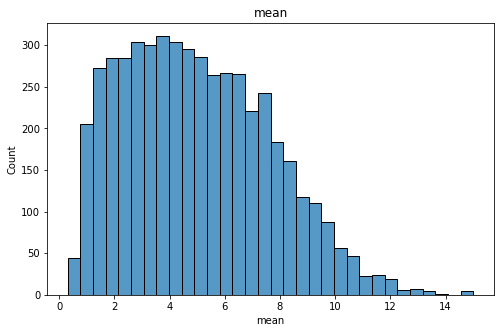

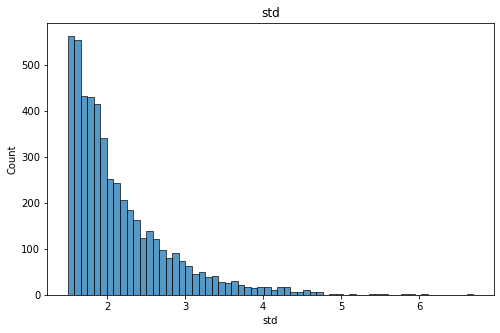

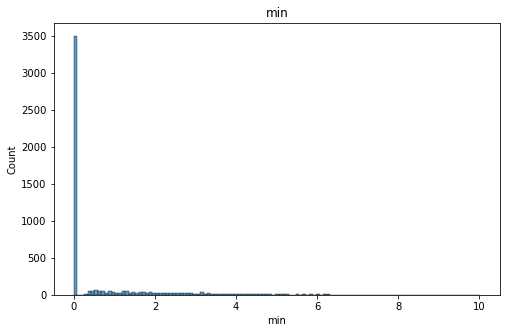

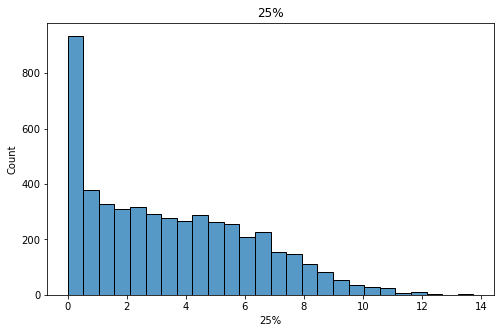

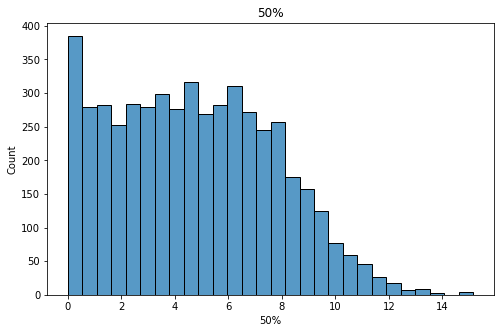

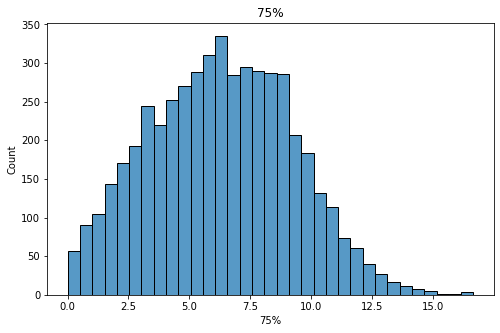

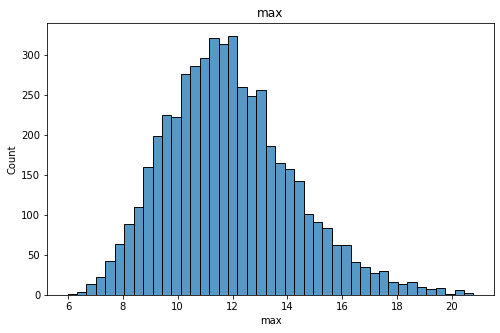

In [10]:
# stats
i = 1
for stat in des.index[1:]:
    plt.figure(figsize=(8,5))
    plt.title(stat)
    sns.histplot(x=des_4.iloc[i])
    plt.show()
    plt.close()
    i+=1

## Task 3

In [11]:
# df after variance filtering
df_vfilter = df[des_3.index].copy()

In [12]:
#define PCA model to use
pca = PCA(n_components=10)

#fit PCA model to data
pca_fit = pca.fit(df_vfilter)
pca_space = pca_fit.transform(df_vfilter)

In [13]:
n_components = 4

In [14]:
# scatter
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_fit.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_space[:,0:n_components],
    labels=labels,
    dimensions=range(n_components),
    color=c_labels.Class
)
fig.update_traces(diagonal_visible=False)
fig.show()

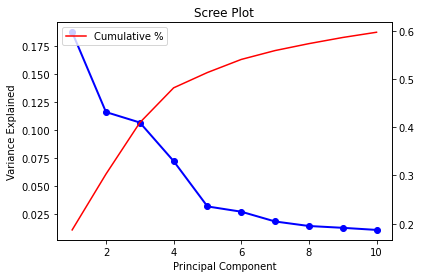

In [15]:
# explainability by PCA
PC_values = np.arange(pca_fit.n_components_) + 1
ax = plt.subplot(111)
ax1 = ax.twinx()
ax.plot(PC_values, pca_fit.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
sns.lineplot(y=np.cumsum(pca_fit.explained_variance_ratio_), 
             x=PC_values, 
             ax=ax1,
             color="red",
             markers = ["O"],
             label="Cumulative %")
ax1.legend()
ax.set_title('Scree Plot')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
plt.show()

# Question 1.2

## Task 4

In [55]:
# KMeans
trials = 100
clus = [2,3,4,5,6]

In [107]:
# KMeans
inertia_matrix = np.zeros((trials,len(clus)))
silhouettes_matrix = np.zeros((trials,len(clus)))
db_matrix = np.zeros((trials,len(clus)))


for i in range(trials):
    inertias = []
    silhouettes = []
    db_scores = []
    
    for k in clus:
        kmeans = KMeans(n_clusters=k, init="random").fit(pca_space[:,0:7])
        predicted_labels = kmeans.labels_
        
        silhouette = silhouette_score(pca_space[:,0:7],predicted_labels)
        silhouettes.append(silhouette)
        
        db_score = davies_bouldin_score(pca_space[:,0:7],predicted_labels)
        db_scores.append(db_score)
        
        inertia = kmeans.inertia_
        inertias.append(inertia)
    
    inertia_matrix[i,:] = np.array(inertias)
    silhouettes_matrix[i,:] = np.array(silhouettes)
    db_matrix[i,:] = np.array(db_scores)

In [108]:
# prepare for visualization
df_ine = pd.DataFrame(inertia_matrix)
df_resp_ine = None
for column in df_ine.columns:
    temp_df = pd.DataFrame({"inertia":df_ine[column],"clusters":clus[column]})
    df_resp_ine = pd.concat([df_resp_ine,temp_df])
    
df_sil = pd.DataFrame(silhouettes_matrix)
df_resp_sil = None
for column in df_sil.columns:
    temp_df = pd.DataFrame({"silhouette":df_sil[column],"clusters":clus[column]})
    df_resp_sil = pd.concat([df_resp_sil,temp_df])
    
df_db = pd.DataFrame(db_matrix)
df_resp_db = None
for column in df_db.columns:
    temp_df = pd.DataFrame({"db_score":df_db[column],"clusters":clus[column]})
    df_resp_db = pd.concat([df_resp_db,temp_df])
    

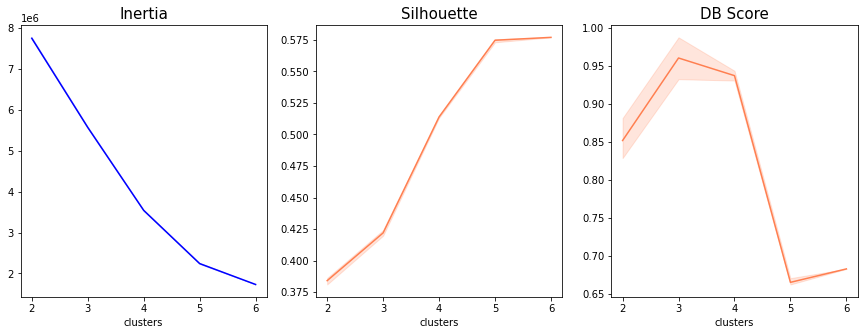

In [109]:
# Kmeans, three indices
plt.figure(figsize=(15,5))
ax = plt.subplot(131)
ax1 = plt.subplot(132)
ax2 = plt.subplot(133)
sns.lineplot(y="inertia",
             x="clusters",
             data=df_resp_ine,
             sort=False,
             ax=ax,
             color="blue")
ax.set_title("Inertia",fontsize=15)
ax.set_ylabel("")

sns.lineplot(y="silhouette",
             x="clusters",
             data=df_resp_sil,
             sort=False,
             ax=ax1,
             color="coral")
ax1.set_title("Silhouette",fontsize=15)
ax1.set_ylabel("")

sns.lineplot(y="db_score",
             x="clusters",
             data=df_resp_db,
             sort=False,
             ax=ax2,
             color="coral")
ax2.set_title("DB Score",fontsize=15)
ax2.set_ylabel("")
plt.show()

In [124]:
# scatter
kmeans = KMeans(n_clusters=5, init="random").fit(pca_space[:,0:7])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_fit.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_space[:,0:4],
    labels=labels,
    dimensions=range(4),
    color=kmeans.labels_
)
fig.update_traces(diagonal_visible=False)
fig.show()

K = 5 does the trick with all three metrics

In [110]:
# GaussianMixture
trials = 100
clus = [2,3,4,5,6]

In [111]:
# GaussianMixture
bic_matrix = np.zeros((trials,len(clus)))
aic_matrix = np.zeros((trials,len(clus)))
silhouettes_matrix = np.zeros((trials,len(clus)))
db_matrix = np.zeros((trials,len(clus)))


for i in range(trials):
    bics = []
    aics = []
    silhouettes = []
    db_scores = []
    
    for k in clus:
        gm = GaussianMixture(n_components=k).fit(pca_space[:,0:7])
        predicted_labels = gm.predict(pca_space[:,0:7])
        
        silhouette = silhouette_score(pca_space[:,0:7],predicted_labels)
        silhouettes.append(silhouette)
        
        db_score = davies_bouldin_score(pca_space[:,0:7],predicted_labels)
        db_scores.append(db_score)
        
        bic = gm.bic(pca_space[:,0:7])
        bics.append(bic)
        
        aic = gm.aic(pca_space[:,0:7])
        aics.append(aic)
    
    bic_matrix[i,:] = np.array(bics)
    aic_matrix[i,:] = np.array(aics)
    silhouettes_matrix[i,:] = np.array(silhouettes)
    db_matrix[i,:] = np.array(db_scores)

In [112]:
# prepare for visualization
df_bic = pd.DataFrame(bic_matrix)
df_resp_bic = None
for column in df_ine.columns:
    temp_df = pd.DataFrame({"bic":df_bic[column],"clusters":clus[column]})
    df_resp_bic = pd.concat([df_resp_bic,temp_df])
    
df_aic = pd.DataFrame(aic_matrix)
df_resp_aic = None
for column in df_aic.columns:
    temp_df = pd.DataFrame({"aic":df_aic[column],"clusters":clus[column]})
    df_resp_aic = pd.concat([df_resp_aic,temp_df])
    
df_sil = pd.DataFrame(silhouettes_matrix)
df_resp_sil = None
for column in df_sil.columns:
    temp_df = pd.DataFrame({"silhouette":df_sil[column],"clusters":clus[column]})
    df_resp_sil = pd.concat([df_resp_sil,temp_df])
    
df_db = pd.DataFrame(db_matrix)
df_resp_db = None
for column in df_db.columns:
    temp_df = pd.DataFrame({"db_score":df_db[column],"clusters":clus[column]})
    df_resp_db = pd.concat([df_resp_db,temp_df])
    

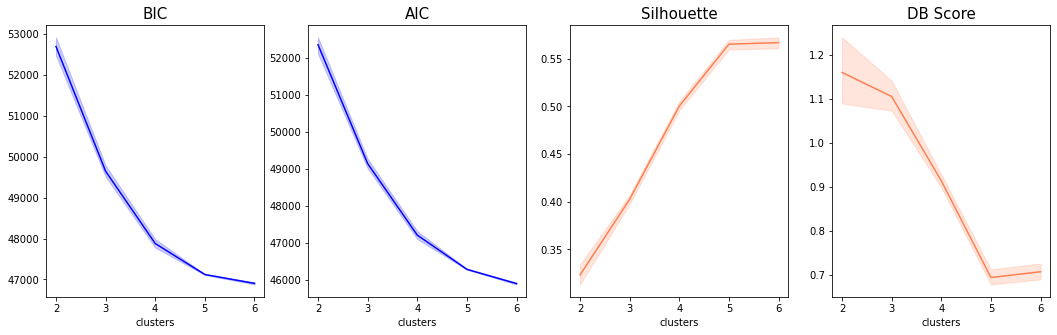

In [113]:
# GaussianMixture, three indices
plt.figure(figsize=(18,5))
ax0 = plt.subplot(141)
ax = plt.subplot(142)
ax1 = plt.subplot(143)
ax2 = plt.subplot(144)
sns.lineplot(y="bic",
             x="clusters",
             data=df_resp_bic,
             sort=False,
             ax=ax0,
             color="blue")
ax0.set_title("BIC",fontsize=15)
ax0.set_ylabel("")

sns.lineplot(y="aic",
             x="clusters",
             data=df_resp_aic,
             sort=False,
             ax=ax,
             color="blue")
ax.set_title("AIC",fontsize=15)
ax.set_ylabel("")

sns.lineplot(y="silhouette",
             x="clusters",
             data=df_resp_sil,
             sort=False,
             ax=ax1,
             color="coral")
ax1.set_title("Silhouette",fontsize=15)
ax1.set_ylabel("")

sns.lineplot(y="db_score",
             x="clusters",
             data=df_resp_db,
             sort=False,
             ax=ax2,
             color="coral")
ax2.set_title("DB Score",fontsize=15)
ax2.set_ylabel("")
plt.show()

In [122]:
# scatter
gm = GaussianMixture(n_components=5).fit(pca_space[:,0:7])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_fit.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_space[:,0:4],
    labels=labels,
    dimensions=range(4),
    color=gm.predict(pca_space[:,0:7])
)
fig.update_traces(diagonal_visible=False)
fig.show()

5 again

In [114]:
# Hierarchical
trials = 100
clus = [2,3,4,5,6]

In [115]:
# Hierarchical
silhouettes_matrix = np.zeros((trials,len(clus)))
db_matrix = np.zeros((trials,len(clus)))


for i in range(trials):
    silhouettes = []
    db_scores = []
    
    for k in clus:
        hc = AgglomerativeClustering(n_clusters=k,linkage="single").fit(pca_space[:,0:7])
        predicted_labels = hc.labels_
        
        silhouette = silhouette_score(pca_space[:,0:7],predicted_labels)
        silhouettes.append(silhouette)
        
        db_score = davies_bouldin_score(pca_space[:,0:7],predicted_labels)
        db_scores.append(db_score)
        
    silhouettes_matrix[i,:] = np.array(silhouettes)
    db_matrix[i,:] = np.array(db_scores)

In [116]:
# prepare for visualization
df_sil = pd.DataFrame(silhouettes_matrix)
df_resp_sil = None
for column in df_sil.columns:
    temp_df = pd.DataFrame({"silhouette":df_sil[column],"clusters":clus[column]})
    df_resp_sil = pd.concat([df_resp_sil,temp_df])
    
df_db = pd.DataFrame(db_matrix)
df_resp_db = None
for column in df_db.columns:
    temp_df = pd.DataFrame({"db_score":df_db[column],"clusters":clus[column]})
    df_resp_db = pd.concat([df_resp_db,temp_df])
    

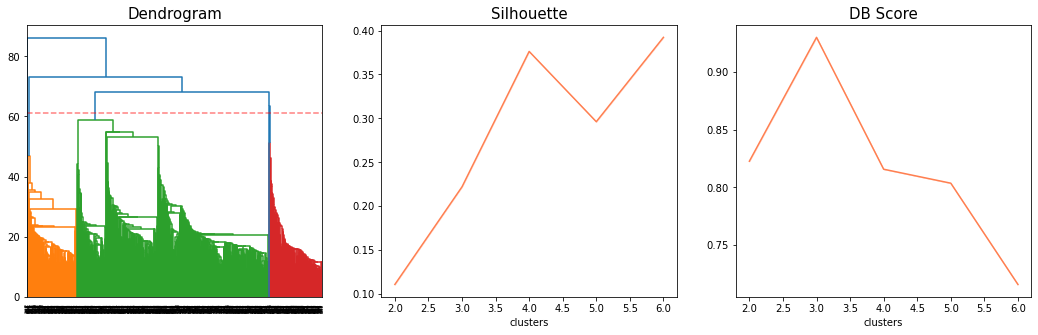

In [119]:
# Hierarchical, three indices
plt.figure(figsize=(18,5))
ax = plt.subplot(131)
ax1 = plt.subplot(132)
ax2 = plt.subplot(133)

dend = shc.dendrogram(shc.linkage(pca_space[:,0:7], method='single'),ax=ax)
ax.axhline(y = 61, color = 'r', linestyle = '--',alpha=0.5)
ax.set_title("Dendrogram",fontsize=15)
ax.set_ylabel("")

sns.lineplot(y="db_score",
             x="clusters",
             data=df_resp_db,
             sort=False,
             ax=ax2,
             color="coral")
ax2.set_title("DB Score",fontsize=15)
ax2.set_ylabel("")

sns.lineplot(y="silhouette",
             x="clusters",
             data=df_resp_sil,
             sort=False,
             ax=ax1,
             color="coral")
ax1.set_title("Silhouette",fontsize=15)
ax1.set_ylabel("")

plt.show()



In [125]:
# scatter
hc = AgglomerativeClustering(n_clusters=5,linkage="single").fit(pca_space[:,0:7])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_fit.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_space[:,0:4],
    labels=labels,
    dimensions=range(4),
    color=hc.labels_
)
fig.update_traces(diagonal_visible=False)
fig.show()

Text(0.5, 1.0, 'Single linkage')

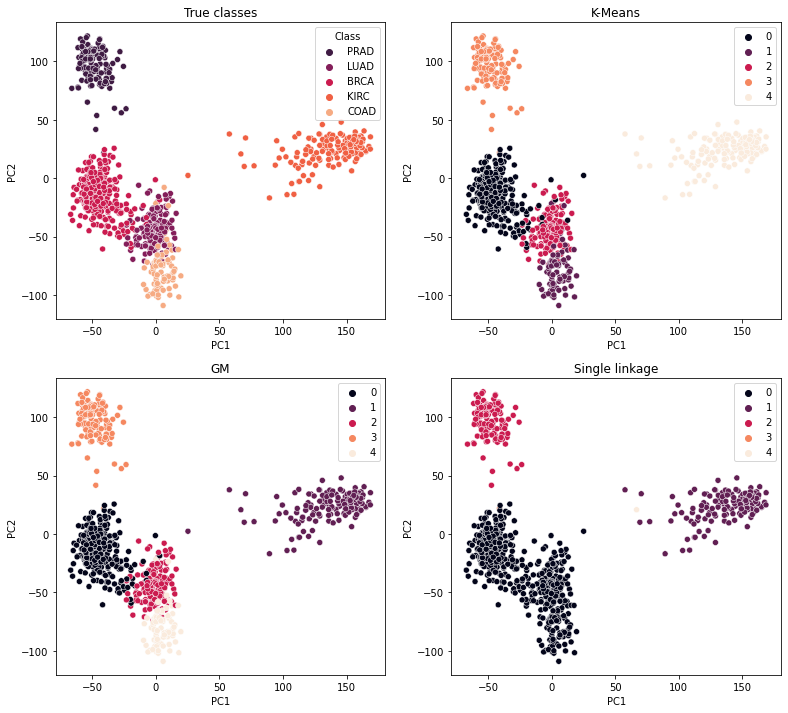

In [163]:
# Versus true labels
plt.figure(figsize=(13,12))
ax = plt.subplot(221)
ax1 = plt.subplot(222)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)

sns.scatterplot(x=pca_space[:,0],
                y=pca_space[:,1],
                hue = c_labels.Class,
                palette="rocket",
                ax=ax)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title('True classes')

sns.scatterplot(x=pca_space[:,0],
                y=pca_space[:,1],
                hue = kmeans.labels_,
                palette="rocket",
                ax=ax1)
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_title('K-Means')

sns.scatterplot(x=pca_space[:,0],
                y=pca_space[:,1],
                hue = gm.predict(pca_space[:,0:7]),
                palette="rocket",
                ax=ax2)
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_title('GM')

sns.scatterplot(x=pca_space[:,0],
                y=pca_space[:,1],
                hue = hc.labels_,
                palette="rocket",
                ax=ax3)
ax3.set_xlabel("PC1")
ax3.set_ylabel("PC2")
ax3.set_title('Single linkage')


Text(0.5, 1.0, 'Single linkage')

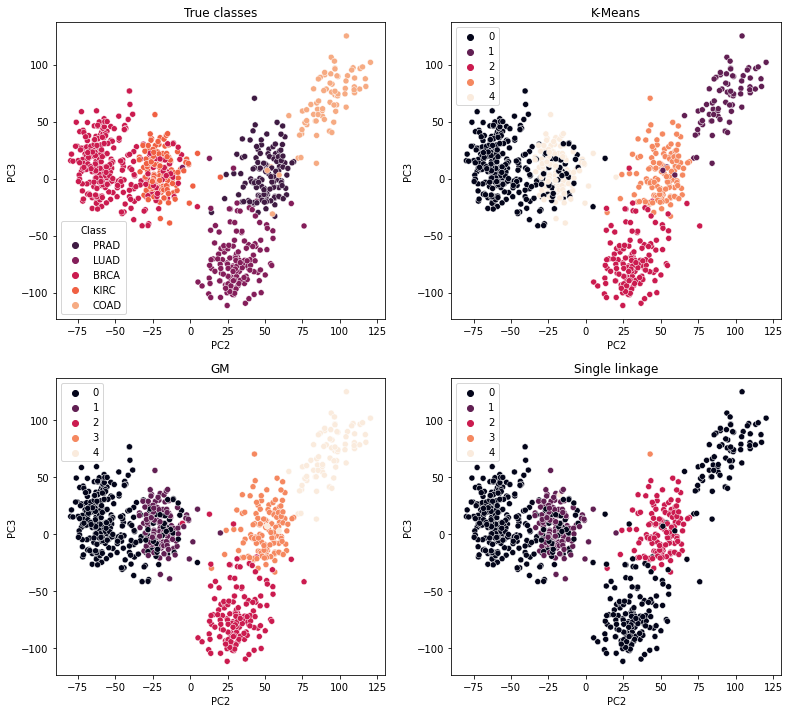

In [164]:
# Versus true labels
plt.figure(figsize=(13,12))
ax = plt.subplot(221)
ax1 = plt.subplot(222)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)

sns.scatterplot(x=pca_space[:,2],
                y=pca_space[:,3],
                hue = c_labels.Class,
                palette="rocket",
                ax=ax)
ax.set_xlabel("PC2")
ax.set_ylabel("PC3")
ax.set_title('True classes')

sns.scatterplot(x=pca_space[:,2],
                y=pca_space[:,3],
                hue = kmeans.labels_,
                palette="rocket",
                ax=ax1)
ax1.set_xlabel("PC2")
ax1.set_ylabel("PC3")
ax1.set_title('K-Means')

sns.scatterplot(x=pca_space[:,2],
                y=pca_space[:,3],
                hue = gm.predict(pca_space[:,0:7]),
                palette="rocket",
                ax=ax2)
ax2.set_xlabel("PC2")
ax2.set_ylabel("PC3")
ax2.set_title('GM')

sns.scatterplot(x=pca_space[:,2],
                y=pca_space[:,3],
                hue = hc.labels_,
                palette="rocket",
                ax=ax3)
ax3.set_xlabel("PC2")
ax3.set_ylabel("PC3")
ax3.set_title('Single linkage')


# Question 2 - Consensus Clustering

## Task 5

# Question 3 - Theme C

## Task 6

In [182]:
# ground values
kmeansG = KMeans(n_clusters=5, init="random").fit(pca_space[:,0:7])
ground_predicted_labels = kmeansG.labels_
ground_homo = homogeneity_score(c_labels.Class,ground_predicted_labels)
ground_comp = completeness_score(c_labels.Class,ground_predicted_labels)
ground_v = v_measure_score(c_labels.Class,ground_predicted_labels)

In [180]:
# test performance
bootstrap = 100
features = np.arange(1000,11000,1000)

In [186]:
# raw variance filter
homo_matrix = np.zeros((bootstrap,len(features)))
comp_matrix = np.zeros((bootstrap,len(features)))
v_matrix = np.zeros((bootstrap,len(features)))

for j in range(bootstrap):
    homos = []
    comps = []
    vs = []
    for i in features:
        df_t6 = des_2.sort_values(by="std",ascending=False).head(i)
        df_vfilter6 = df[df_t6.index].copy()
        kmeans = KMeans(n_clusters=5, init="random").fit(df_vfilter6)

        predicted_labels = kmeans.labels_
        homo = homogeneity_score(c_labels.Class,predicted_labels)
        comp = completeness_score(c_labels.Class,predicted_labels)
        v = v_measure_score(c_labels.Class,predicted_labels)
        
        homos.append(homo)
        comps.append(comp)
        vs.append(v)
        
    homo_matrix[j,:] = np.array(homos)
    comp_matrix[j,:] = np.array(comps)
    v_matrix[j,:] = np.array(vs)

In [187]:
# prepare for visualization
df_hom = pd.DataFrame(homo_matrix)
df_resp_hom = None
for column in df_hom.columns:
    temp_df = pd.DataFrame({"homogeneity":df_hom[column],"number_features":features[column]})
    df_resp_hom = pd.concat([df_resp_hom,temp_df])
    
df_com = pd.DataFrame(comp_matrix)
df_resp_com = None
for column in df_com.columns:
    temp_df = pd.DataFrame({"completeness":df_com[column],"number_features":features[column]})
    df_resp_com = pd.concat([df_resp_com,temp_df])
    
df_v = pd.DataFrame(v_matrix)
df_resp_v = None
for column in df_v.columns:
    temp_df = pd.DataFrame({"v_measure":df_v[column],"number_features":features[column]})
    df_resp_v = pd.concat([df_resp_v,temp_df])
    

In [185]:
# test performance
bootstrap = 100
features = np.arange(1,11,1)

In [173]:
# pca
homo_matrix_pca = np.zeros((bootstrap,len(features)))
comp_matrix_pca = np.zeros((bootstrap,len(features)))
v_matrix_pca = np.zeros((bootstrap,len(features)))

#define PCA model to use
pca = PCA(n_components=10)

#fit PCA model to data
pca_fit = pca.fit(df_vfilter)
pca_space = pca_fit.transform(df_vfilter)

for j in range(bootstrap):
    homos = []
    comps = []
    vs = []
    for i in features:
        kmeans = KMeans(n_clusters=5, init="random").fit(pca_space[:,0:i])

        predicted_labels = kmeans.labels_
        homo = homogeneity_score(c_labels.Class,predicted_labels)
        comp = completeness_score(c_labels.Class,predicted_labels)
        v = v_measure_score(c_labels.Class,predicted_labels)
        
        homos.append(homo)
        comps.append(comp)
        vs.append(v)
        
    homo_matrix_pca[j,:] = np.array(homos)
    comp_matrix_pca[j,:] = np.array(comps)
    v_matrix_pca[j,:] = np.array(vs)

In [174]:
# prepare for visualization
df_hom_pca = pd.DataFrame(homo_matrix_pca)
df_resp_hom_pca = None
for column in df_hom_pca.columns:
    temp_df = pd.DataFrame({"homogeneity":df_hom_pca[column],"number_features":features[column]})
    df_resp_hom_pca = pd.concat([df_resp_hom_pca,temp_df])
    
df_com_pca = pd.DataFrame(comp_matrix_pca)
df_resp_com_pca = None
for column in df_com_pca.columns:
    temp_df = pd.DataFrame({"completeness":df_com_pca[column],"number_features":features[column]})
    df_resp_com_pca = pd.concat([df_resp_com_pca,temp_df])
    
df_v_pca = pd.DataFrame(v_matrix_pca)
df_resp_v_pca = None
for column in df_v_pca.columns:
    temp_df = pd.DataFrame({"v_measure":df_v_pca[column],"number_features":features[column]})
    df_resp_v_pca = pd.concat([df_resp_v_pca,temp_df])
    

Text(0.5, 1.0, 'Homogeneity')

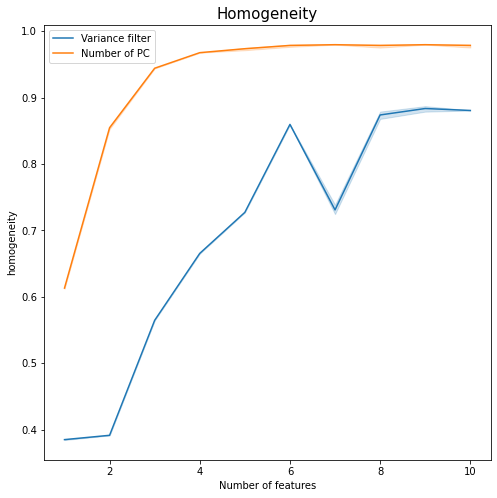

In [68]:
# homogeneity
plt.figure(figsize=(8,8))

sns.lineplot(y="homogeneity",
             x="number_features",
             data=df_resp_hom,
             label="Variance filter",
             sort=False)

sns.lineplot(y=df_resp_hom_pca["homogeneity"],
             x=df_resp_hom_pca["number_features"].values,
             label="Number of PC",
             sort=False)
plt.xlabel("Number of features")
plt.legend()
plt.title("Homogeneity",fontsize=15)



Text(0.5, 1.0, 'Completeness')

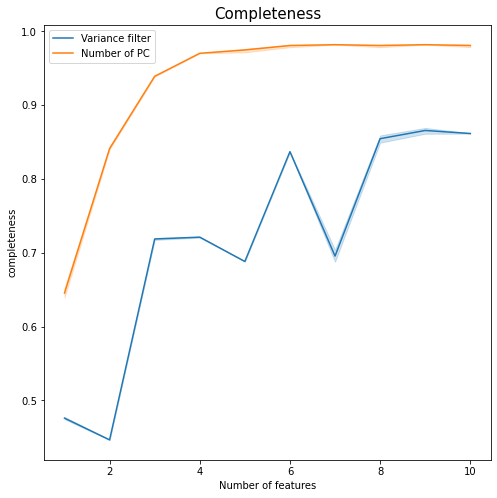

In [71]:
# completeness
plt.figure(figsize=(8,8))

sns.lineplot(y="completeness",
             x="number_features",
             data=df_resp_com,
             label="Variance filter",
             sort=False)
sns.lineplot(y=df_resp_com_pca["completeness"],
             x=df_resp_com_pca["number_features"].values,
             label="Number of PC",
             sort=False)
plt.xlabel("Number of features")
plt.legend()
plt.title("Completeness",fontsize=15)




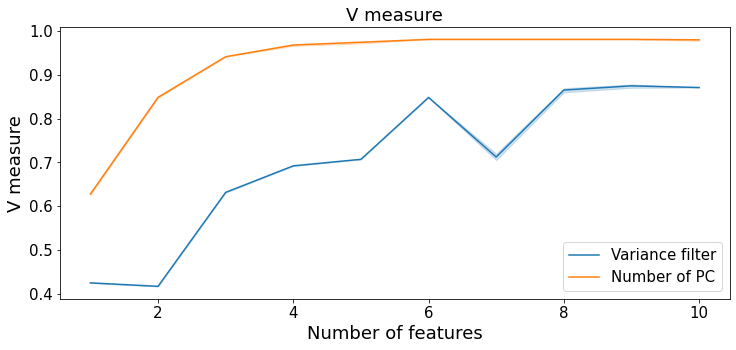

In [188]:
# v-measure
plt.figure(figsize=(12,5))

sns.lineplot(y="v_measure",
             x="number_features",
             data=df_resp_v,
             label="Variance filter",
             sort=False)
sns.lineplot(y=df_resp_v_pca["v_measure"],
             x=df_resp_v_pca["number_features"].values,
             label="Number of PC",
             sort=False)
plt.xlabel("Number of features", fontsize=18)
plt.ylabel("V measure", fontsize=18)
plt.legend(fontsize=15)
plt.title("V measure",fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()



Text(0.5, 1.0, 'Number of features: 10')

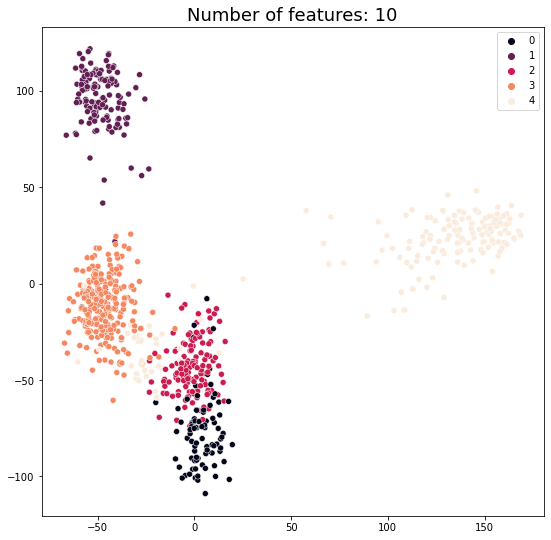

In [113]:
nf=10
df_t6 = des_2.sort_values(by="std",ascending=False).head(nf)
df_vfilter6 = df[df_t6.index].copy()
kmeans = KMeans(n_clusters=5, init="random").fit(df_vfilter6)
plt.figure(figsize=(9,9))
sns.scatterplot(x=pca_space[:,0],
                y=pca_space[:,1],
                hue = kmeans.labels_,
                palette="rocket")
plt.title(f"Number of features: {nf}",fontsize=18)

Text(0.5, 1.0, 'Number of PC: 2')

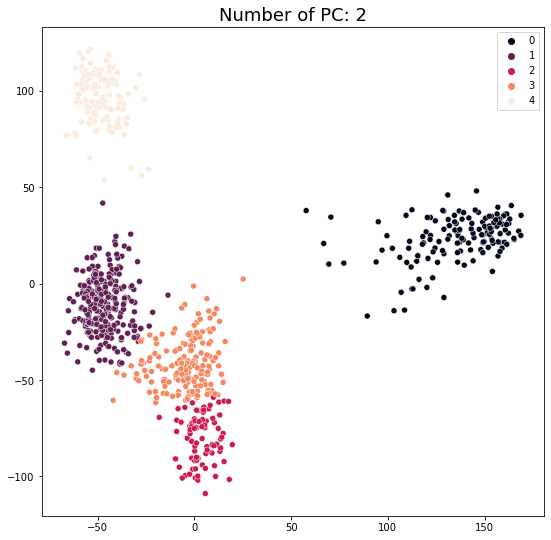

In [114]:
nf = 2
kmeans = KMeans(n_clusters=5, init="random").fit(pca_space[:,0:nf])
plt.figure(figsize=(9,9))
sns.scatterplot(x=pca_space[:,0],
                y=pca_space[:,1],
                hue = kmeans.labels_,
                palette="rocket")
plt.title(f"Number of PC: {nf}",fontsize=18)

Text(0.5, 1.0, 'True classes')

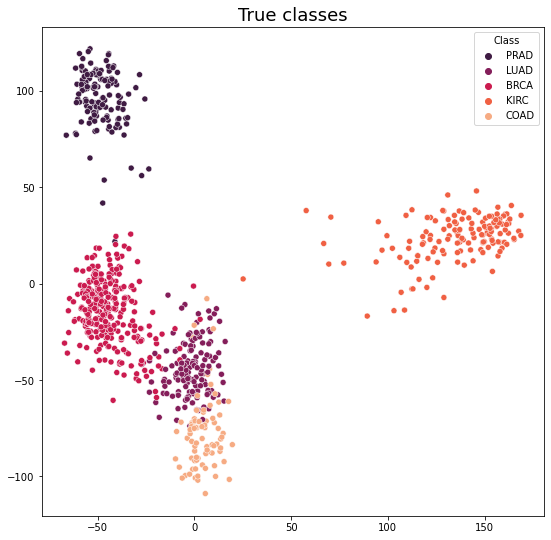

In [115]:
plt.figure(figsize=(9,9))
sns.scatterplot(x=pca_space[:,0],
                y=pca_space[:,1],
                hue = c_labels.Class,
                palette="rocket")
plt.title(f"True classes",fontsize=18)


Unimodal versus multimodal

In [16]:
# Unimodal versus multimodal
des_3 = des_2.sort_values(by="std",ascending=False)
df_vfilter1 = df[des_3.index].copy()
resp = {}

for i in df_vfilter1.columns:
    x = df_vfilter1[i]
    dip, pval = diptest.diptest(x)
    if pval <=0.05:
        resp[i] = dip



In [17]:
dip_test = pd.DataFrame(data={"genes":resp.keys(), "dip": resp.values()})

In [18]:
mono = dip_test.sort_values(by="dip").head(10)
multi = dip_test.sort_values(by="dip").tail(10)

In [28]:
multi

genes       dip
30   gene_19296  0.095793
4    gene_19661  0.100574
24    gene_7964  0.109733
3    gene_15301  0.110529
59    gene_5453  0.113228
73   gene_19313  0.115036
350  gene_13831  0.117835
118  gene_19913  0.119149
15    gene_8891  0.126809
10    gene_4773  0.135975

In [ ]:
trials = 100

In [143]:
v_matrix_mode

array([[0.44100226, 0.3301149 , 0.32462497, 0.32462497, 0.32590059,
        0.32590059, 0.32590059, 0.32590059, 0.32590059, 0.32590059,
        0.32590059],
       [0.61126828, 0.62208848, 0.41254411, 0.54038707, 0.54180622,
        0.54180622, 0.54180622, 0.54180622, 0.54180622, 0.53576841,
        0.5421518 ],
       [0.55064692, 0.63741934, 0.53627824, 0.66648331, 0.6501867 ,
        0.64698966, 0.63421048, 0.63537476, 0.63373336, 0.49146478,
        0.49623721],
       [0.5166044 , 0.60100584, 0.60067161, 0.70826317, 0.67981339,
        0.68294232, 0.66644511, 0.58916533, 0.58719342, 0.46154231,
        0.46097481],
       [0.52845134, 0.55758905, 0.56088993, 0.65878141, 0.63496418,
        0.6946607 , 0.66402892, 0.55798081, 0.55817071, 0.46586695,
        0.46522098],
       [0.57191476, 0.53850704, 0.54643768, 0.63045755, 0.61732185,
        0.67457349, 0.64318519, 0.59024268, 0.59060401, 0.46821748,
        0.46617365],
       [0.55234789, 0.52866357, 0.53257491, 0.60727869, 0.

In [142]:
v_matrix_mode = np.zeros((7,11))
homo_matrix_mode = np.zeros((7,11))
comp_matrix_mode = np.zeros((7,11))
clusters= [2,3,4,5,6,7,8]
for c in range(len(clusters)):

    for k in range(len(mono.genes)+1):
        homos = []
        comps = []
        vs = []
        genes = list(mono.genes[k:]) + list(multi.genes[:k])

        for j in range(10):
            kmeans = KMeans(n_clusters=clusters[c], init="random").fit(df[genes].copy())

            predicted_labels = kmeans.labels_
            homo = homogeneity_score(c_labels.Class,predicted_labels)
            comp = completeness_score(c_labels.Class,predicted_labels)
            v = v_measure_score(c_labels.Class,predicted_labels)

            homos.append(homo)
            comps.append(comp)
            vs.append(v)
        homo_matrix_mode[c,k] = np.median(np.array(homos))
        comp_matrix_mode[c,k] = np.median(np.array(comps))
        v_matrix_mode[c,k] = np.median(np.array(vs))

In [125]:
k=3
genes = list(mono.genes[k:]) + list(multi.genes[:k])
kmeans = KMeans(n_clusters=3, init="random").fit(df[genes].copy())

In [126]:
print(len(genes))

10


In [127]:
predicted_labels = kmeans.labels_
v = v_measure_score(c_labels.Class,predicted_labels)
print(v)

0.5403870731616374


In [144]:
df_v_mode = pd.DataFrame(v_matrix_mode)
df_resp_v_mode = None
for column in df_v_mode.columns:
    temp_df = pd.DataFrame({"v_measure":df_v_mode[column],"number_features":perc[column]})
    df_resp_v_mode = pd.concat([df_resp_v_mode,temp_df])

In [145]:
df_v_mode_final = df_resp_v_mode.reset_index()

In [146]:
df_v_mode_final.loc[:,"index"] = df_v_mode_final["index"] + 2

In [147]:
df_v_mode_final.rename(columns={"index":"clusters"},inplace=True)

In [148]:
df_v_mode_final

clusters  v_measure  number_features
0          2   0.441002              0.0
1          3   0.611268              0.0
2          4   0.550647              0.0
3          5   0.516604              0.0
4          6   0.528451              0.0
..       ...        ...              ...
72         4   0.496237              1.0
73         5   0.460975              1.0
74         6   0.465221              1.0
75         7   0.466174              1.0
76         8   0.449295              1.0

[77 rows x 3 columns]

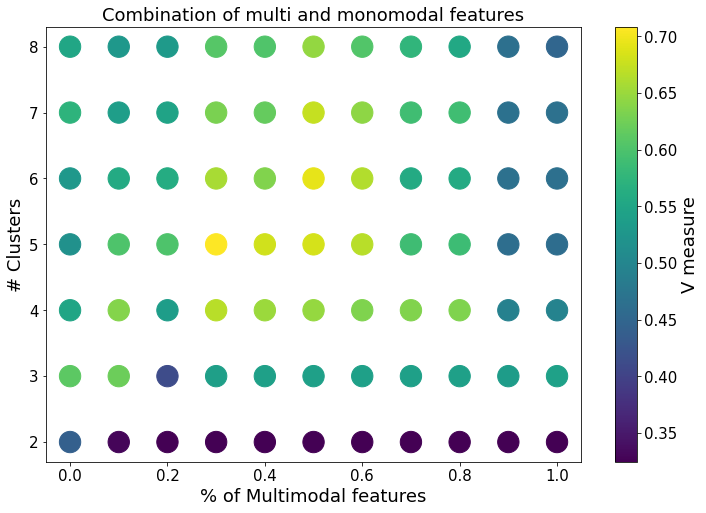

In [168]:
plt.figure(figsize=(12,8))
plt.title("Combination of multi and monomodal features", fontsize=18)
sc = plt.scatter(x = df_v_mode_final.number_features,
                 y = df_v_mode_final.clusters,
                 c=df_v_mode_final.v_measure,
                 s=455.5)
cbar = plt.colorbar(sc)
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
plt.ylabel('# Clusters',fontsize=18)
plt.xlabel(r'% of Multimodal features',fontsize=18)
cbar.set_label(r'V measure', rotation=90,fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [42]:
pd.DataFrame(v_matrix_mode).T

0         1         2         3         4         5         6   \
0   0.516665  0.585575  0.600672  0.708263  0.679813  0.682942  0.668361   
1   0.517662  0.600139  0.600672  0.708263  0.679813  0.682942  0.666445   
2   0.516604  0.605031  0.600672  0.708263  0.687777  0.679610  0.666445   
3   0.511980  0.601006  0.600672  0.711672  0.599676  0.682942  0.666445   
4   0.516604  0.600139  0.600672  0.708263  0.599676  0.679610  0.666445   
..       ...       ...       ...       ...       ...       ...       ...   
95  0.513969  0.600139  0.600672  0.615073  0.679813  0.679610  0.668361   
96  0.513544  0.600139  0.600672  0.708263  0.599676  0.703544  0.666445   
97  0.517684  0.600139  0.600672  0.708263  0.687777  0.682942  0.655750   
98  0.512882  0.601230  0.600672  0.708263  0.679813  0.679610  0.630755   
99  0.515770  0.601230  0.600672  0.708263  0.679813  0.703544  0.641103   

          7         8         9         10  
0   0.590525  0.587193  0.461542  0.460975  
1   0.588158  0.588439  0.460975  0.460975  
2   0.590496  0.587193  0.494563  0.460975  
3   0.589165  0.587193  0.461542  0.495185  
4   0.588158  0.587193  0.461542  0.460975  
..       ...       ...       ...       ...  
95  0.589923  0.586788  0.461542  0.460975  
96  0.590525  0.588439  0.460975  0.460975  
97  0.589923  0.588439  0.461542  0.460975  
98  0.588158  0.586788  0.461542  0.460975  
99  0.589165  0.586788  0.461542  0.460975  

[100 rows x 11 columns]

In [45]:
perc = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [51]:
df_v_mode = pd.DataFrame(v_matrix_mode).T
df_resp_v_mode = None
for column in df_v_mode.columns:
    temp_df = pd.DataFrame({"v_measure":df_v_mode[column],"number_features":perc[column]})
    df_resp_v_mode = pd.concat([df_resp_v_mode,temp_df])
    
df_homo_mode = pd.DataFrame(homo_matrix_mode).T
df_resp_homo_mode = None
for column in df_homo_mode.columns:
    temp_df = pd.DataFrame({"homo_measure":df_homo_mode[column],"number_features":perc[column]})
    df_resp_homo_mode = pd.concat([df_resp_homo_mode,temp_df])

In [52]:
df_resp_homo_mode

homo_measure  number_features
0       0.528892              0.0
1       0.529809              0.0
2       0.528732              0.0
3       0.523802              0.0
4       0.528732              0.0
..           ...              ...
95      0.469060              1.0
96      0.469060              1.0
97      0.469060              1.0
98      0.469060              1.0
99      0.469060              1.0

[1100 rows x 2 columns]

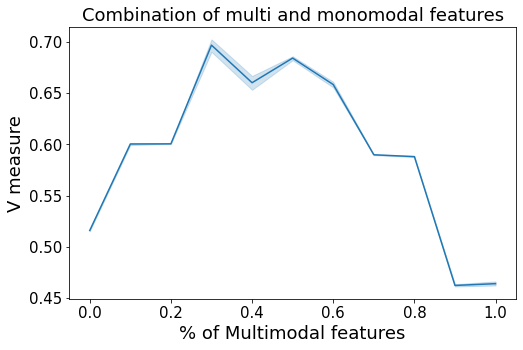

In [62]:
plt.figure(figsize=(8,5))
plt.title("Combination of multi and monomodal features", fontsize=18)
sns.lineplot(y="v_measure",
             x="number_features",
             data=df_resp_v_mode,
             sort=False)
plt.xlabel("% of Multimodal features",fontsize=18)
plt.ylabel("V measure", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
# test type
for i in range(trials):
    
homos = []
comps = []
vs = []
for j in range(100):
    kmeans = KMeans(n_clusters=5, init="random").fit(df[multi.genes].copy())

    predicted_labels = kmeans.labels_
    homo = homogeneity_score(c_labels.Class,predicted_labels)
    comp = completeness_score(c_labels.Class,predicted_labels)
    v = v_measure_score(c_labels.Class,predicted_labels)
    
    homos.append(homo)
    comps.append(comp)
    vs.append(v)
        
    

Text(0.5, 1.0, 'Mono')

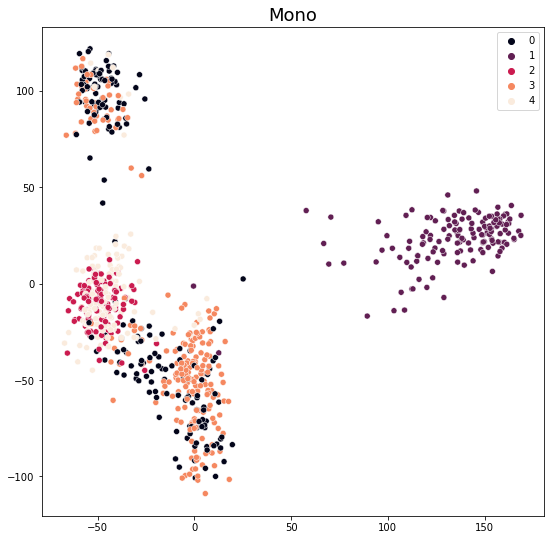

In [138]:
df_vfilter6 = df[mono.genes].copy()
kmeans = KMeans(n_clusters=5, init="random").fit(df_vfilter6)
plt.figure(figsize=(9,9))
sns.scatterplot(x=pca_space[:,0],
                y=pca_space[:,1],
                hue = kmeans.labels_,
                palette="rocket")
plt.title("Mono",fontsize=18)

In [159]:
df_vfilter6["gene_19296"]

gene_19296  gene_19661  gene_7964  gene_15301  gene_5453  \
sample_0      8.934844    1.094912   5.248778   13.618145  10.109935   
sample_1      0.000000   11.169775   3.890826    0.000000   0.000000   
sample_2      8.693773    0.000000   1.074163   12.759976   9.803905   
sample_3     10.297260    1.031960   2.650029   12.353276   9.285448   
sample_4      0.000000   12.783131   0.000000    0.000000   0.000000   
...                ...         ...        ...         ...        ...   
sample_796    0.000000   12.387045   0.000000    0.000000   0.000000   
sample_797    9.564435    1.784043   9.488065   12.987499   8.892792   
sample_798    8.931524    3.762944   7.092662   11.204602   9.316978   
sample_799    9.660435    3.687374   8.328302   13.105047   8.788337   
sample_800    7.645392    0.748375   1.603929    9.990756   6.723913   

            gene_19313  gene_13831  gene_19913  gene_8891  gene_4773  
sample_0      8.597878    5.001253    7.475709   8.839037   9.840658  
sample_1      0.000000    5.503393    0.323658   0.000000   0.000000  
sample_2      8.783368    0.000000    8.276897   9.930788  10.485527  
sample_3      8.449660    3.726700    8.550566  10.287539  10.071087  
sample_4      0.000000    6.109791    0.000000   0.000000   0.000000  
...                ...         ...         ...        ...        ...  
sample_796    0.000000    6.573106    0.000000   0.000000   0.000000  
sample_797    8.932805    0.000000    8.740584  11.428962  10.484914  
sample_798    8.267316    0.000000    7.993906  10.561259  10.647288  
sample_799    8.590591    7.049685    7.623699  10.338837  10.186647  
sample_800    6.525250    5.111328    6.331798   8.430591   8.697190  

[801 rows x 10 columns]

In [1]:
df_vfilter6 = df[mono.genes].copy()
kmeans = KMeans(n_clusters=5, init="random").fit(df_vfilter6)
plt.figure(figsize=(9,9))
sns.jointplot(x=df_vfilter6[df_vfilter6.columns[3]],
                y=df_vfilter6[df_vfilter6.columns[4]],
                hue = c_labels.Class,
                palette="rocket")
plt.title("Mono",fontsize=18)

NameError: name 'df' is not defined

In [157]:
homos = []
comps = []
vs = []
for j in range(100):
    kmeans = KMeans(n_clusters=5, init="random").fit(df[multi.genes].copy())

    predicted_labels = kmeans.labels_
    homo = homogeneity_score(c_labels.Class,predicted_labels)
    comp = completeness_score(c_labels.Class,predicted_labels)
    v = v_measure_score(c_labels.Class,predicted_labels)
    
    homos.append(homo)
    comps.append(comp)
    vs.append(v)
        
        

Text(0.5, 1.0, 'Multi')

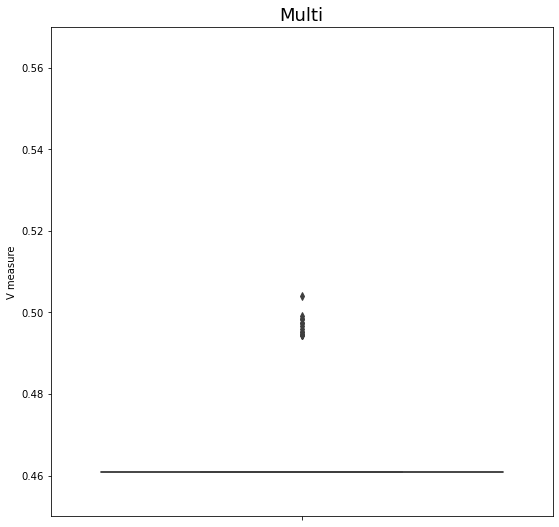

In [158]:
plt.figure(figsize=(9,9))
sns.boxplot(y=vs)
plt.ylim(0.45,0.57)
plt.ylabel('V measure')
plt.title("Multi",fontsize=18)